# Análise dos Salários dos Servidores Federais por Gênero

Essa análise será feita com os dados do portal de Transparência do Governo Federal de Set/2016. Por simplicidade, somente o salário bruto foi analisado, mas é importante notar que ele não representa o salário real de ums servidor pois está sujeito a descontos e bonus. 
Como essa base de dados não disponibilizava a informação de gênero, esse campo foi inferido a partir da base de dados de candidatos do TSE. Para isso, comparou-se o primeiro nome com o gênero e calculou-se a probabilidade do nome ser de algum gênero usando o cálculo (masculino - feminino) / total_de_aparicoes . Por exemplo, 

João aparece 10 vezes como gênero masculino, então a probabilidade de so gênero ser masculino é 1.0

Fabiani aparece 3 vezes como masculino e 2 como feminino, então a probabilidade é (3 - 2) / 5 = 0.2

Maria, como João, só apareceu como feminino, então tem probabilidade - 1.0

Assim, somente o valor absoluto de probabilidades maiores que 0.6 foram consideradas. Isso fez com que a base de  590,670 pessoas ficasse reduzida para 553,672 pessoas, uma diferença de 36,998 pessoas, 0.06%.  

As perguntas respondidas são:

**1. Qual é a proporção entre homens e mulheres tanto em número quanto em quantidade de dinheiro recebida?**

**2. Existe diferença na média salarial entre gêneros? Se sim, ela é estatisticamente significativa?**

**3. Da parcela de 1% que recebe mais, existe uma prevalência de gênero?**

**4. Qual a variação de proporção entre homens e mulheres entre faixas salariais faixas salariais?**

**5. Qual o índice gini da distribuição salarias? (EXTRA)**

#### Fontes
 - Salários dos servidores federais: http://www.portaltransparencia.gov.br/downloads/servidores.asp
 - Base de dados do TSE: http://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais

In [338]:
# Main Imports
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set()

In [337]:
# import data
df_data.to_csv('../data/final/data_sexo_final.csv', index=False)
df_data.head()

,index,NOME,ID_SERVIDOR_PORTAL,REMUNERACAO_BASICA_BRUTA,PRIMEIRO_NOME,sexo,sexo2,bins
0,590669,LUIZ AUGUSTO NOBREGA BARROSO,2222257,0.0,luiz,0.998929,Masc,"(-51.994, 5199.371]"
1,417235,BRAULIO AUGUSTO BREIDENBACH PUPIM,1796860,0.0,braulio,1.000000,Masc,"(-51.994, 5199.371]"
2,123754,HENRIQUE COSTA DOS REIS,1237185,0.0,henrique,1.000000,Masc,"(-51.994, 5199.371]"
3,574426,TULIO MIRANDA BRANDO,2165070,0.0,tulio,1.000000,Masc,"(-51.994, 5199.371]"
4,123728,RITA DE CASSIA SOUSA CERQUEIRA,1237120,0.0,rita,-1.000000,Fem,"(-51.994, 5199.371]"


In [339]:
import plotly.plotly as py
import cufflinks as cf

In [340]:
# Estatística Descritiva dos gêneros
df_data.groupby('sexo2').describe()["REMUNERACAO_BASICA_BRUTA"]

sexo2       
Fem    count    240614.000000
       mean       8272.953188
       std        5365.910239
       min           0.000000
       25%        4577.990000
       50%        6735.820000
       75%       10640.027500
       max       48939.460000
Masc   count    313058.000000
       mean       9195.915146
       std        6050.270430
       min           0.000000
       25%        4872.920000
       50%        7257.470000
       75%       12025.682500
       max       51993.710000
Name: REMUNERACAO_BASICA_BRUTA, dtype: float64

### 1. Qual é a proporção entre homens e mulheres tanto em número quanto em quantidade de dinheiro recebida?

#### Em número de pessoas

Qtdade Homens:  858 
Qtdade Mulheres:  559
Proporçao:  1.53488372093 homem para cada mulher


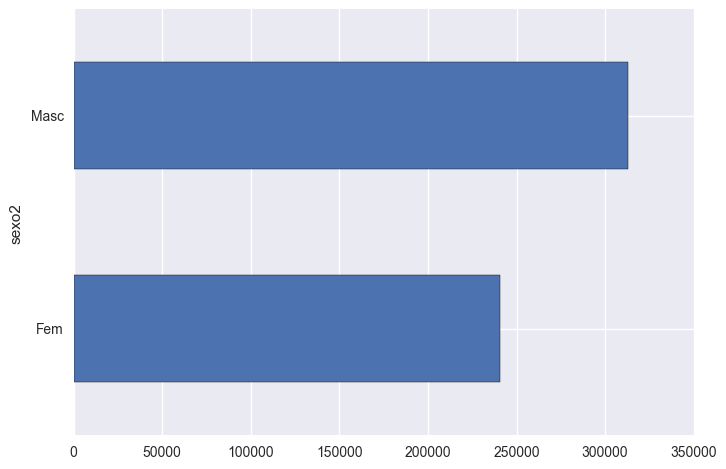

In [341]:
df_gender = df_data.groupby('sexo2').count()['sexo']
df_gender.plot(kind='barh')

print "Qtdade Homens: ", len_homem, "\nQtdade Mulheres: ", len_mulher
print "Proporçao: ", float(len_homem) / float(len_mulher), "homem para cada mulher"

#### Em renda

Renda dos  Homens:  2878854803.73 reais 
Renda das Mulheres:  1990588358.47 reais
Proporçao:  1.44623311569 real de homem para cada real de mulher


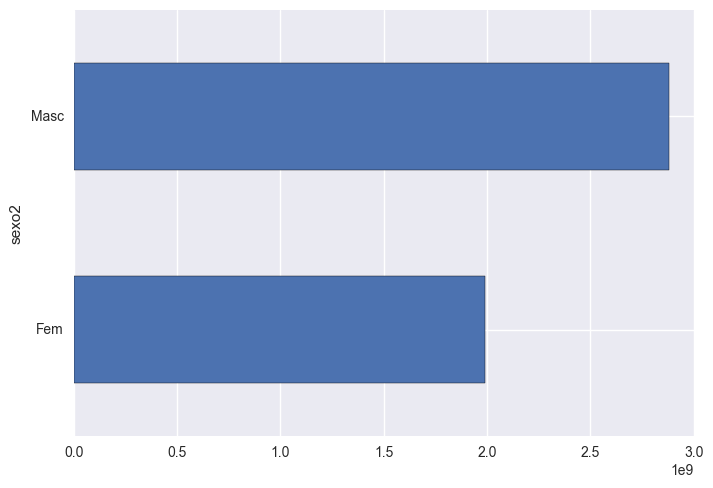

In [342]:
df_gender = df_data.groupby('sexo2').sum()['REMUNERACAO_BASICA_BRUTA']
df_gender.plot(kind='barh')

print "Renda dos  Homens: ", df_gender.iloc[1], "reais \nRenda das Mulheres: ", df_gender.iloc[0], 'reais'
print "Proporçao: ", df_gender.iloc[1] / df_gender.iloc[0], "real de homem para cada real de mulher"

## 2. Existe diferença na média salarial entre gêneros? Se sim, ela é estatisticamente significativa?

A média salarial dos gêneros é:

R\$ 8272 para Mulheres com desvio padrão de R\$ 5365. 8 10

R\$ 9195 para Homens com desvio padrão de R\$ 6050

** Algumas opções de vizualição da distribuição de salários entre homens e mulheres **

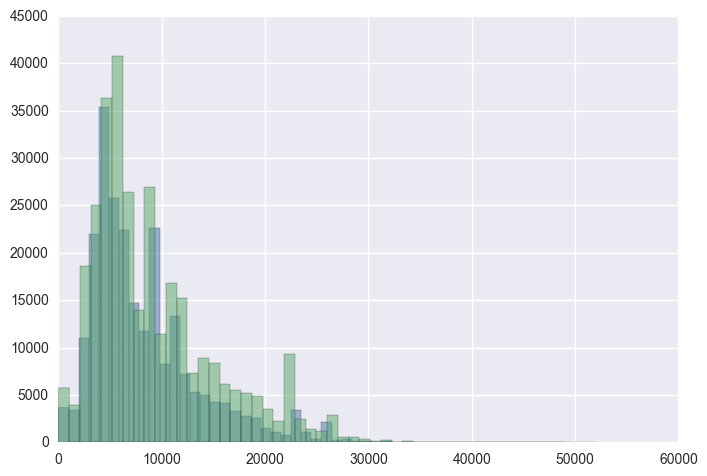

In [343]:
for i in ['Fem','Masc']:
    plt.hist(df_data[df_data['sexo2'] == i]['REMUNERACAO_BASICA_BRUTA'], alpha=0.5, bins=50)
    #sns.kdeplot(df_data[df_data['sexo'] == i]['REMUNERACAO_BASICA_BRUTA'], shade=True)
    #sns.distplot(df_data[df_data['sexo'] == i]['REMUNERACAO_BASICA_BRUTA'], bins=50)

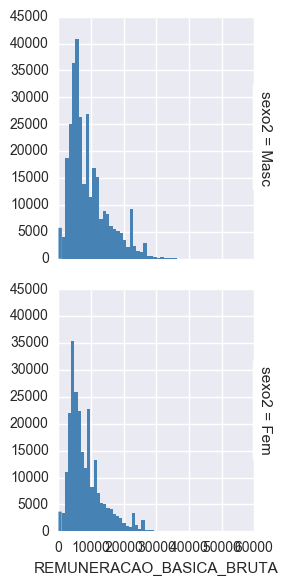

In [344]:
import numpy as np
g = sns.FacetGrid(df_data, row="sexo2", margin_titles=True)

g.map(plt.hist, 'REMUNERACAO_BASICA_BRUTA', color="steelblue", bins=50, lw=0)

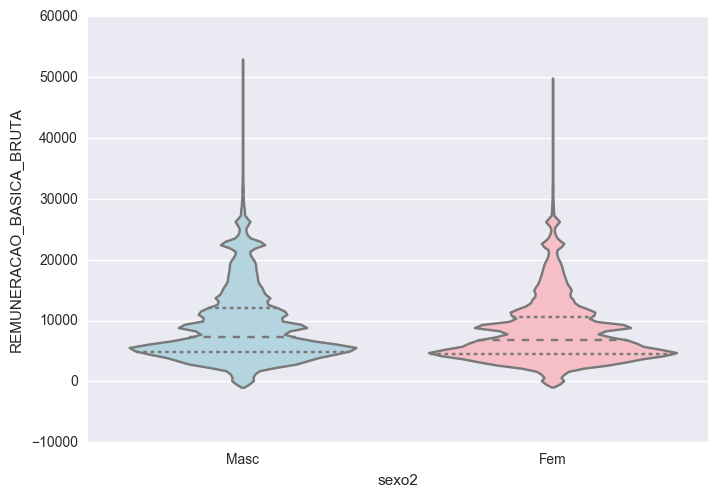

In [345]:
sns.violinplot("sexo2", 'REMUNERACAO_BASICA_BRUTA', data=df_data, palette=["lightblue", "lightpink"], inner="quartile");

{'boxes': [<matplotlib.lines.Line2D at 0x13713ff50>,
 'caps': [<matplotlib.lines.Line2D at 0x12c647f50>,
 'fliers': [<matplotlib.lines.Line2D at 0x137850350>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x12c647cd0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x1371b7ed0>,
  <matplotlib.lines.Line2D at 0x140b85390>]}

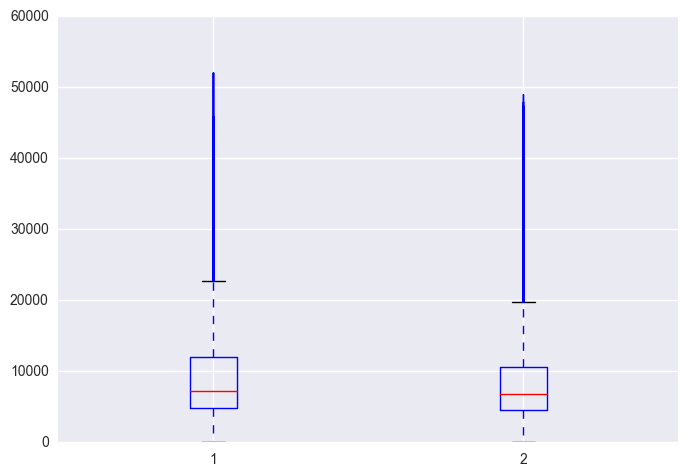

In [346]:
plt.boxplot([homem_rem, mulher_rem])

##### Teste de hipótese para saber se a diferença na média salarial é significante. 

Sendo μ1 a média salarials dos homens e μ2 a média salarial das mulheres, as hipóteses serão:

    H0: μ1 = μ2
    H1: μ1< μ2 or
    H1: μ1> μ2 or
    H1: μ1≠ μ2
    
Mas como o valor P calculado é de 0, 
##### a chance dessa diferença de salários ser por variação estatística é nula.


In [347]:
from scipy import stats

In [348]:
homem_rem = df_data[df_data['sexo2'] == 'Masc']['REMUNERACAO_BASICA_BRUTA']
mulher_rem = df_data[df_data['sexo2'] == 'Fem']['REMUNERACAO_BASICA_BRUTA']

In [349]:
stat, valor_p = stats.ttest_ind(homem_rem, mulher_rem) 
print 'Valor P:', valor_p

Valor P: 0.0


### 3. Da parcela de 1% que recebe mais, existe uma prevalência de gênero?

Existem mais homens do que mulheres,
Qtdade Homens:  858 
Qtdade Mulheres:  559
Proporçao:  1.53488372093 homem para cada mulher

Mas a diferença entre média salarial é mais equilibrada, com valor p de 0.15. Porém, ainda é o lado da mulher que pende para o menor

In [350]:
# find out where the  1% salary starts
def get_perc(data, perc):
    
    perc_total = data.sum() * perc * 0.01
    
    data = data.sort_values(ascending=False).reset_index()
    
    sumed = 0
    for i, row in data.iterrows():
        
        if sumed < perc_total:
            sumed = sumed + row['REMUNERACAO_BASICA_BRUTA']  
            
        else:
            return row['REMUNERACAO_BASICA_BRUTA'] 
    
min_sal_10_masc = get_perc(df_data[df_data["sexo2"] == 'Masc']['REMUNERACAO_BASICA_BRUTA'], 1)
min_sal_10_fem = get_perc(df_data[df_data["sexo2"] == 'Fem']['REMUNERACAO_BASICA_BRUTA'], 1)

In [351]:
df_data_10_masc = df_data[(df_data['REMUNERACAO_BASICA_BRUTA'] > min_sal_10_masc) & 
                         (df_data['sexo2'] == 'Masc')]
df_data_10_fem = df_data[(df_data['REMUNERACAO_BASICA_BRUTA'] > min_sal_10_fem) & 
                         (df_data['sexo2'] == 'Fem')]

Qtdade Homens:  858 
Qtdade Mulheres:  559
Proporçao:  1.53488372093 homem para cada mulher


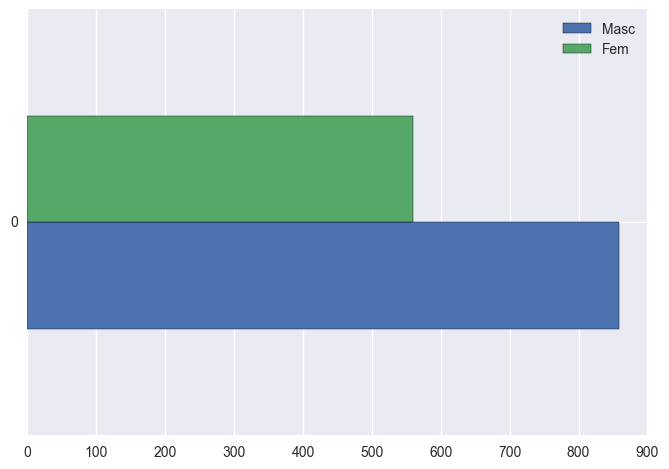

In [352]:
len_homem = len(df_data_10_masc)
len_mulher = len(df_data_10_fem)

df_gender = pd.DataFrame([len_homem, len_mulher], index=["Masc", "Fem"]).transpose()
df_gender.plot(kind='barh')
print "Qtdade Homens: ", len_homem, "\nQtdade Mulheres: ", len_mulher
print "Proporçao: ", float(len_homem) / float(len_mulher), "homem para cada mulher"

(array([ 44.,  44.,  31.,  29.,  31.,  20.,  88.,  19.,  11.,  11.,  30.,
         14.,  17.,  21.,  21.,  17.,  11.,  10.,  12.,   7.,   5.,   1.,
         10.,   9.,   3.,   5.,   2.,   3.,   2.,   3.,   4.,   0.,   3.,
          2.,   5.,   3.,   2.,   0.,   0.,   1.,   1.,   1.,   0.,   2.,
          0.,   1.,   1.,   1.,   0.,   1.]),
 array([ 29254.69  ,  29648.3854,  30042.0808,  30435.7762,  30829.4716,
         31223.167 ,  31616.8624,  32010.5578,  32404.2532,  32797.9486,
         33191.644 ,  33585.3394,  33979.0348,  34372.7302,  34766.4256,
         35160.121 ,  35553.8164,  35947.5118,  36341.2072,  36734.9026,
         37128.598 ,  37522.2934,  37915.9888,  38309.6842,  38703.3796,
         39097.075 ,  39490.7704,  39884.4658,  40278.1612,  40671.8566,
         41065.552 ,  41459.2474,  41852.9428,  42246.6382,  42640.3336,
         43034.029 ,  43427.7244,  43821.4198,  44215.1152,  44608.8106,
         45002.506 ,  45396.2014,  45789.8968,  46183.5922,  46577.2876,
 

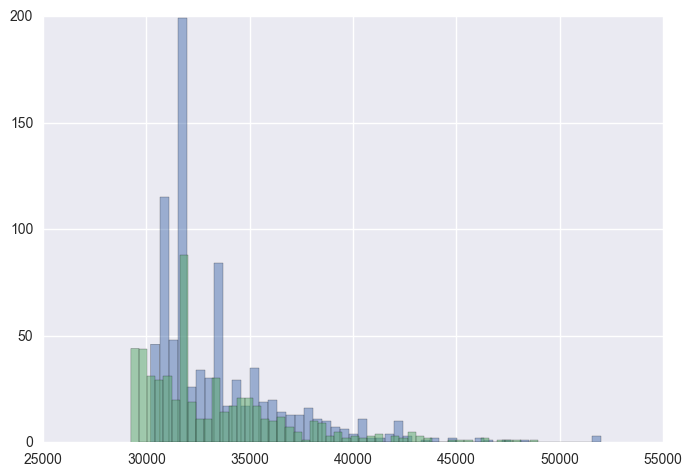

In [353]:
plt.hist(df_data_10_masc['REMUNERACAO_BASICA_BRUTA'], alpha=0.5, bins=50)
plt.hist(df_data_10_fem['REMUNERACAO_BASICA_BRUTA'], alpha=0.5, bins=50)

Describe Homem x Mulher

In [354]:
df_data_10_masc.describe()

,index,ID_SERVIDOR_PORTAL,REMUNERACAO_BASICA_BRUTA,sexo
count,858.000000,8.580000e+02,858.000000,858.000000
mean,284455.861305,1.544726e+06,33561.125338,0.997704
std,164183.087311,3.158089e+05,3238.872737,0.013659
min,127.000000,1.000230e+06,30208.290000,0.692308
25%,151190.250000,1.289264e+06,31555.937500,0.998535
50%,282605.500000,1.539550e+06,32286.680000,0.999674
75%,425716.000000,1.813067e+06,34906.885000,1.000000
max,587741.000000,2.217091e+06,51993.710000,1.000000


In [355]:
df_data_10_fem.describe()

,index,ID_SERVIDOR_PORTAL,REMUNERACAO_BASICA_BRUTA,sexo
count,559.000000,5.590000e+02,559.000000,559.000000
mean,282157.577818,1.539955e+06,33295.721646,-0.996503
std,168648.403250,3.235618e+05,3618.310154,0.018681
min,226.000000,1.000434e+06,29254.690000,-1.000000
25%,133134.000000,1.254944e+06,30759.200000,-1.000000
50%,286477.000000,1.546885e+06,31931.620000,-1.000000
75%,426949.000000,1.815436e+06,34934.790000,-0.998116
max,588767.000000,2.219864e+06,48939.460000,-0.666667


In [356]:
stat, valor_p = stats.ttest_ind(df_data_10_fem['REMUNERACAO_BASICA_BRUTA'], df_data_10_masc['REMUNERACAO_BASICA_BRUTA']) 
print "O valor p é:", valor_p

O valor p é: 0.1504151966


### 4. Qual a variação de proporção entre homens e mulheres entre faixas salariais faixas salariais?

O gráfico mostra que há uma prevalência de homens em todas as faixas salariais. Porém, há uma proporção maior de homens nas faixas médias, entre 20000 e 40000.

In [357]:
df_data = df_data.sort_values(by="REMUNERACAO_BASICA_BRUTA").reset_index()
df_data['bins'] = pd.cut(df_data["REMUNERACAO_BASICA_BRUTA"], 10)

In [358]:
def proportion(x):
    
    total = float(len(x))
    if total > 0:
        
        len_homem = len(x[x['sexo2'] == 'Masc']) / total
        len_mulher = len(x[x['sexo2'] == 'Fem']) / total   
        return len_homem, len_mulher

    else:
        return None, None
    
df_prop = df_data.groupby('bins').apply(proportion)
df_prop = df_prop.reset_index()

In [359]:
def get_mean(x):
    x = x.replace("(", "")
    x = x.replace("]", "")
    a, b = x.split(",")
    a, b = float(a), float(b)
    
    return (a + b) / 2
    
df_prop['bins'] = df_prop['bins'].apply(get_mean)

In [360]:
df_prop['Prop_Homens'] = df_prop[0].apply(lambda x: x[0])
df_prop['Prop_Mulheres'] = df_prop[0].apply(lambda x: x[1])
del df_prop[0]

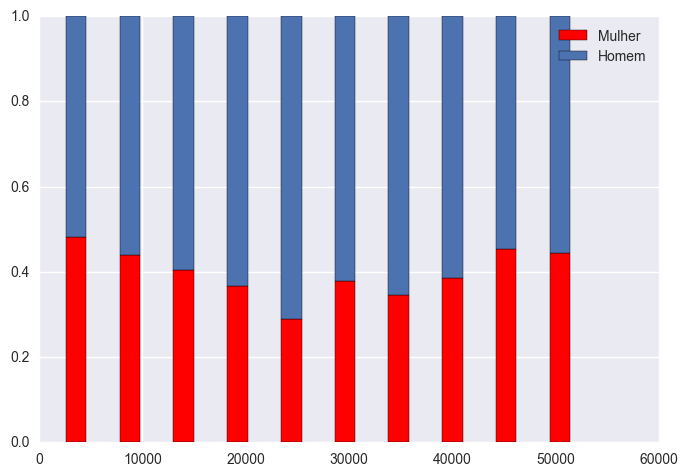

In [361]:
width = 2000
p1 = plt.bar(list(df_prop['bins']), list(df_prop['Prop_Mulheres']),width, color='r')
p2 = plt.bar(list(df_prop['bins']), list(df_prop['Prop_Homens']), width, bottom=list(df_prop['Prop_Mulheres']))

plt.legend((p1[0], p2[0]), ('Mulher','Homem'))

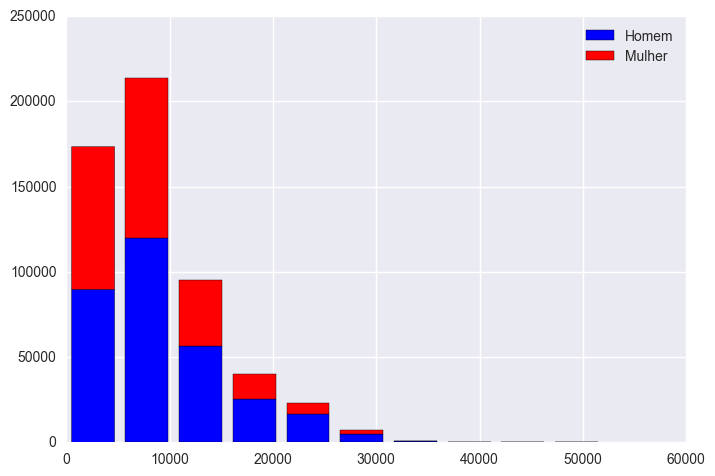

In [362]:
p1 = df_data[df_data['sexo2'] == 'Masc']['REMUNERACAO_BASICA_BRUTA']
p2 = df_data[df_data['sexo2'] == 'Fem']['REMUNERACAO_BASICA_BRUTA']

plt.hist([p1,p2], stacked=True, color=['blue', 'red'])
plt.legend(('Homem','Mulher'))

### 5. Qual o índice gini da distribuição salarias? (extra)

O índice Gini mede a desigualdade de renda num certo contexto, no qual 0 é totalmente igual e 1 é totalmente desigual. 

No salário dos servidores federais o índice é de 0.34, que é relativamente baixo em comparação com o Brasil 0,526.

In [363]:
def gini(list_of_values):
    sorted_list = sorted(list_of_values)
    height, area = 0, 0
    for value in sorted_list:
        height += value
        area += height - value / 2.
    fair_area = height * len(list_of_values) / 2.
    return (fair_area - area) / fair_area

In [364]:
df_gini = pd.read_csv('../data/process/primeiro_nome.csv', index_col='Unnamed: 0')

In [365]:
def to_number(x):
    try:
        return float(x.replace(",","."))
    except:
        print x
df_gini['REMUNERACAO_BASICA_BRUTA'] = df_gini['REMUNERACAO_BASICA_BRUTA'].apply(to_number)

In [366]:
gini(df_gini['REMUNERACAO_BASICA_BRUTA'])

0.34804747891240584